<a href="https://colab.research.google.com/github/Prachi09062003/Deep_learning_pracs/blob/main/Data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
#function to adjust saturation
def adjust_saturation(image, saturation_factor):
  return tf.image.adjust_saturation(image, saturation_factor)

#function to display images with titles
def display_images(images, titles):
  num_images = len(images)
  plt.figure(figsize=(15,20))
  for i, (img,title) in enumerate(zip(images,titles)):
    plt.subplot(2, (num_images + 1) //2, i + 1)
    plt.imshow(tf.keras.preprocessing.image.array_to_img(img))
    plt.title(title)
    plt.axis('off')
  plt.show()

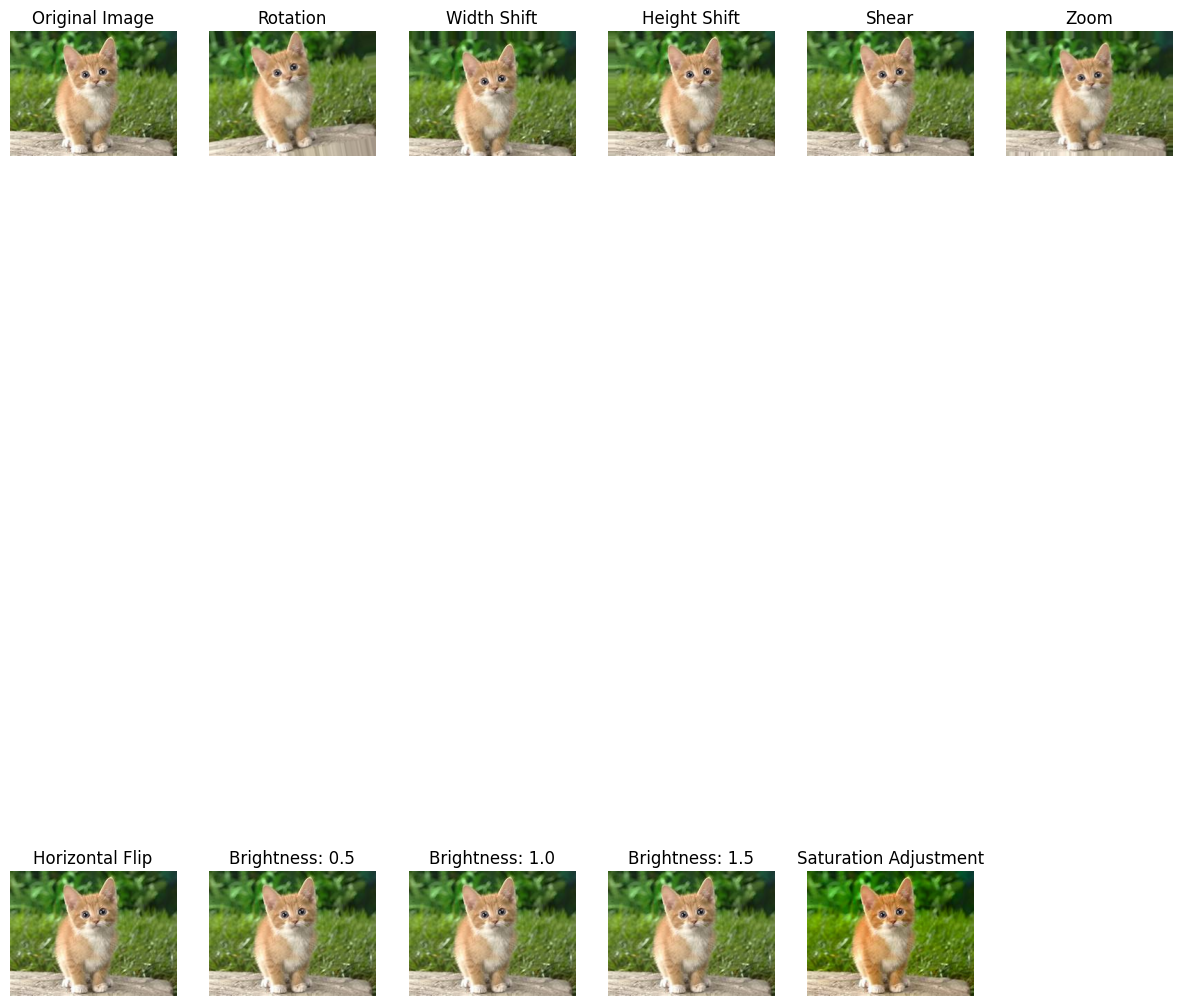

In [4]:
#load an image
img_path ="/content/th.jpg"
img = tf.keras.preprocessing.image.load_img(img_path)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = img_array.reshape((1,) + img_array.shape)

#original image
original_images = [img_array[0]]
titles = ['Original Image']

#define geometric transformations with specific titles
transformations = [
    ('Rotation', ImageDataGenerator(rotation_range=40)),
    ('Width Shift', ImageDataGenerator(width_shift_range=0.2)),
    ('Height Shift', ImageDataGenerator(height_shift_range=0.2)),
    ('Shear', ImageDataGenerator(shear_range=0.2)),
    ('Zoom', ImageDataGenerator(zoom_range=0.2)),
    ('Horizontal Flip', ImageDataGenerator(horizontal_flip=True))
]

# Apply each geometric transformation
for title, generator in transformations:
    for batch in generator.flow(img_array, batch_size=1):
        original_images.append(batch[0])  # Store transformed image
        titles.append(title)  # Only the operation name
        break  # Only take the first batch

# Generate color transformed images (brightness and saturation)
brightness_factors = [0.5, 1.0, 1.5]  # Brightness adjustment factors
for brightness_factor in brightness_factors:
    # Adjust brightness
    brightness_image = tf.image.adjust_brightness(img_array[0], delta=brightness_factor - 1.0)
    original_images.append(brightness_image)  # Store transformed image
    titles.append(f'Brightness: {brightness_factor}')


# Adjust saturation
saturation_image = adjust_saturation(img_array[0], 1.5)  # Pass saturation factor directly
original_images.append(saturation_image)  # Store transformed image
titles.append('Saturation Adjustment')

# Display all images with titles
display_images(original_images, titles)

